<a href="https://colab.research.google.com/github/JaredAlexd/JaredAlexd/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configurando el set de datos**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels)= fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#Vizualizar

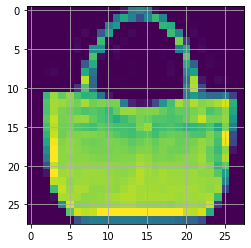

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#mostrar conjunto de datos

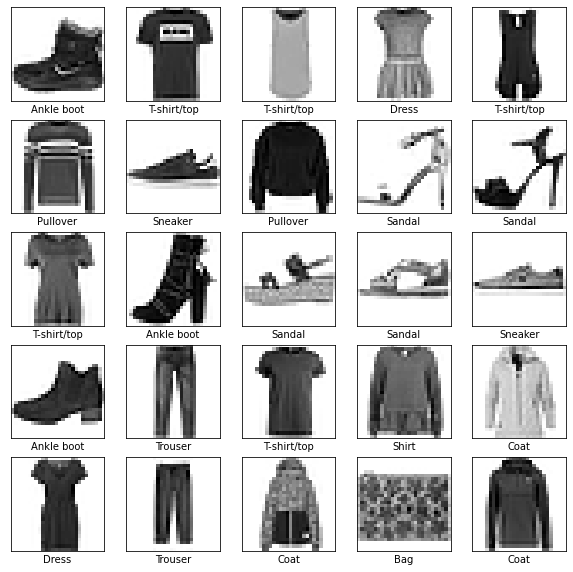

In [ ]:
%matplotlib inline

plt.figure(figsize = (10 , 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

# **Entrenamiento de la red neuronal CONVOLUCIONAL**

In [ ]:
#Definir el modelo y depuracion de analisis
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6319 - accuracy: 0.7809
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3835 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3164 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8938


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3495 - accuracy: 0.8804
Accuracy:  0.8804000020027161


# **Evaluación de la red convolucional**

In [ ]:
predictions= model.predict(test_images)

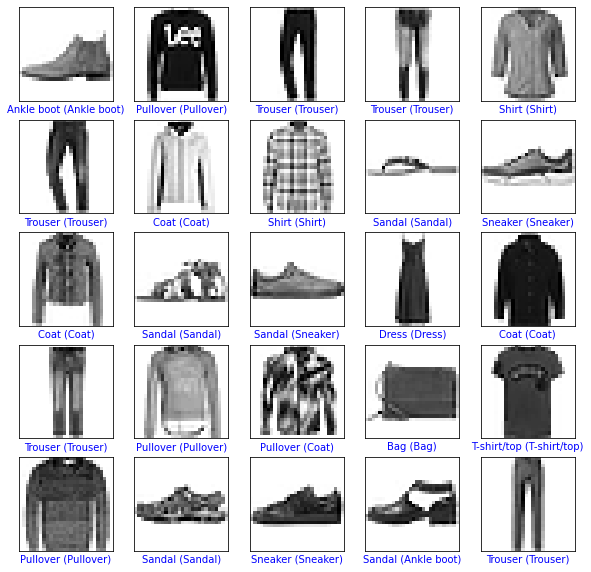

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap= plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label ==true_label:
    color= 'blue'
  else:
    color='red'
  plt.xlabel('{} ({})'. format(class_names[predicted_label], class_names[true_label]), color='blue')

array([0, 1, 2, 3, 4])